In [328]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [329]:
# функция геометрической вероятности
def geometric_probability(size, radius):
  return ((np.pi * radius**2) / (size**2))

In [330]:
def in_circle(size, radius, points):
    
    # генерируем случайные точки и формируем пары [x, y]
    size //= 2
    pairs = [[np.random.uniform(-size, size), np.random.uniform(-size, size)] for _ in range(points)]

    # инициализация списков для попавших точек и не попавших
    true_x, true_y = [], []
    false_x, false_y = [], []
    
    for x, y in pairs:
        if x ** 2 + y ** 2 <= radius ** 2:
            true_x.append(x), true_y.append(y)
        else:
            false_x.append(x), false_y.append(y)

    # оценка по Монте-Карло
    coef = len(true_x) / points
    
    return coef, true_x, true_y, false_x, false_y

In [331]:
# создаем фигуру и область данных
def draw_result(x1, y1, x2, y2, size=10, radius=5):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # пределы отображения (от -8 до 8)
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    
    # оси координат
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    
    # создание квадрата - левый нижний угол в координате (-5, 5); ширина  и высота - size
    square = plt.Rectangle((-(size//2), -(size//2)), size, size, fill=False, edgecolor='blue', linewidth=2)
    
    # создание круга - центр в начале координат; радиус - radius
    circle = plt.Circle((0, 0), radius, fill=False, edgecolor='darkblue', linewidth=2)

    # отрисовка попавших точек и не попавших
    plt.scatter(x1, y1, color="orange", alpha=0.3, s=5)
    plt.scatter(x2, y2, color="lightblue", alpha=0.3, s=5)
    
    # добавляем квадрат на график
    ax.add_patch(square)
    
    # добавляем круг на график
    ax.add_patch(circle)
    
    ax.grid(linestyle='--')
    plt.show()

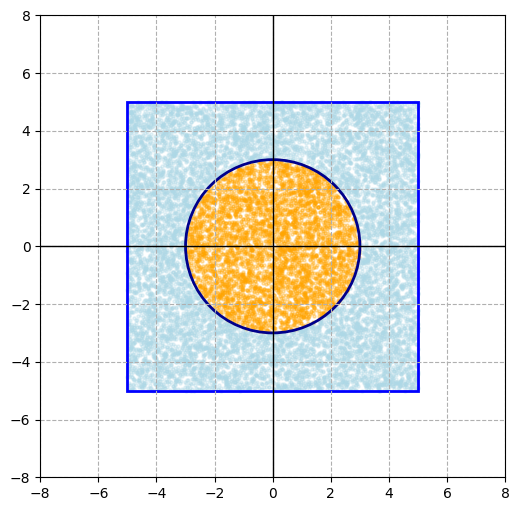

In [332]:
r = 3
monte_coef, true_x, true_y, false_x, false_y = in_circle(size = 10, radius = r, points = 15000)
draw_result(true_x, true_y, false_x, false_y, size = 10, radius = r)

In [333]:
# размер ошибки подсчета геометриеской и Монте-Карло
geom_coef = geometric_probability(size=10, radius=r)
error_size = abs(geom_coef - monte_coef)
error_size

0.002856661176918629

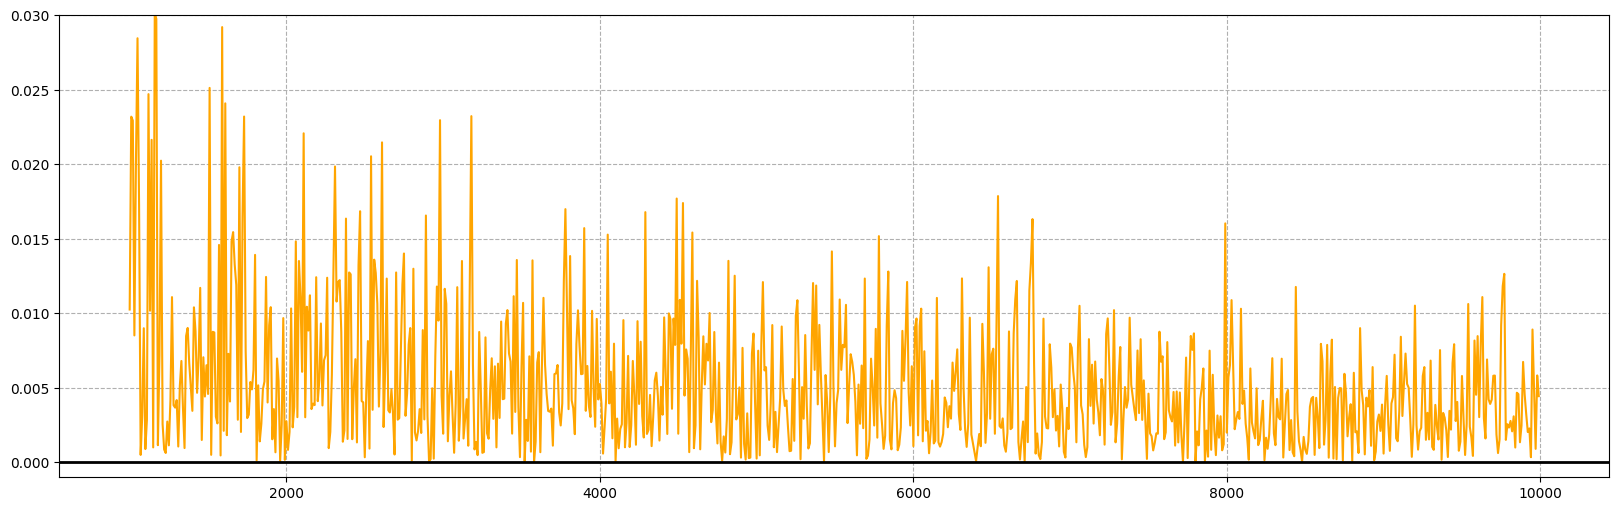

In [336]:
# график оценки ошибок (разниц между геометрической и вычисляемой Монте-Карло) по отношению к количеству элементов
error_list, point_list = [], []

# цикл с шагом 1000 (увеличение точности)
for point in range(1000, 10000, 10):

    # вычисление точек
    m_coef, _, _, _, _ = in_circle(size = 10, radius = r, points = point)
    # вычисление геом. вероятности
    g_coef = geometric_probability(size=10, radius=r)

    # вычисление ошибки (абсолютной разницы)
    error_list.append(abs(g_coef - m_coef))
    point_list.append(point)

# отрисовка графика
plt.figure(figsize=(20, 6))
plt.plot(point_list, error_list, color="orange")
plt.axhline(0, color="black", linewidth="2")
plt.ylim(-0.001, 0.03)

plt.grid(linestyle="--")